<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/DR_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR2', 'DR1', 'DR3']

In [9]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             horizontal_flip = 0.2,
                             vertical_flip = 0.2)

In [10]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                          target_size=(64,64), class_mode='categorical')
valimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                          target_size=(64,64), class_mode='categorical')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                          target_size=(64,64), class_mode='categorical')

Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(3, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [46]:
model.fit(trainimages, batch_size=32, epochs=5, validation_data=valimages)
model.save('DRCNN_model.keras')

Epoch 1/5
3/3 [==============================] - 8s 2s/step - loss: 0.5434 - accuracy: 0.7308 - val_loss: 0.6711 - val_accuracy: 0.7143
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 0.5232 - accuracy: 0.7308 - val_loss: 0.7035 - val_accuracy: 0.8571
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 0.5002 - accuracy: 0.8077 - val_loss: 0.7806 - val_accuracy: 0.7143
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 0.5665 - accuracy: 0.7564 - val_loss: 0.7985 - val_accuracy: 0.7857
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 0.4552 - accuracy: 0.8077 - val_loss: 0.9352 - val_accuracy: 0.6429


In [47]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 1s 811ms/step


array([[1.4704975e-02, 1.3363993e-01, 8.5165513e-01],
       [4.0224344e-02, 4.3055732e-03, 9.5547009e-01],
       [2.8529261e-05, 9.7944152e-01, 2.0529905e-02],
       [4.1786034e-06, 1.0493715e-02, 9.8950201e-01],
       [2.4884129e-01, 2.7807951e-01, 4.7307920e-01],
       [2.1729728e-03, 8.3127785e-01, 1.6654927e-01],
       [1.0374848e-09, 9.9533367e-01, 4.6662316e-03],
       [3.4910328e-05, 4.7767486e-02, 9.5219761e-01],
       [2.6319982e-04, 8.8097245e-02, 9.1163951e-01],
       [6.6219158e-03, 4.6147475e-01, 5.3190327e-01],
       [9.6081151e-03, 1.0238337e-01, 8.8800853e-01],
       [7.9007283e-02, 2.2680758e-02, 8.9831197e-01],
       [1.4781894e-02, 1.0726230e-01, 8.7795579e-01],
       [4.2269957e-01, 1.3053136e-02, 5.6424731e-01]], dtype=float32)

In [48]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [20]:
y_true = testimages.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [21]:
testimages.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2}

In [49]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[0, 1, 2],
       [0, 2, 4],
       [0, 0, 5]])

In [33]:
print(metrics.classification_report(y_true, y_pred1, target_names=['DR1', 'DR2', 'DR3']))

              precision    recall  f1-score   support

         DR1       0.00      0.00      0.00         3
         DR2       0.75      0.50      0.60         6
         DR3       0.44      0.80      0.57         5

    accuracy                           0.50        14
   macro avg       0.40      0.43      0.39        14
weighted avg       0.48      0.50      0.46        14



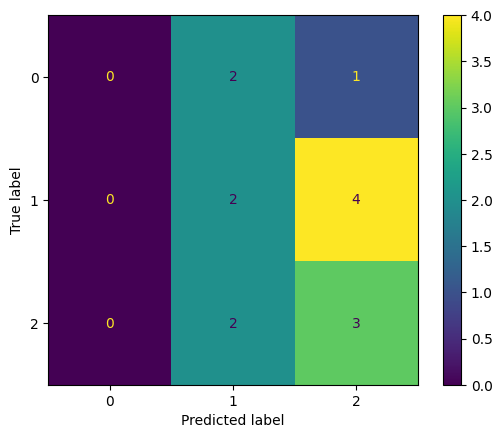

In [24]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

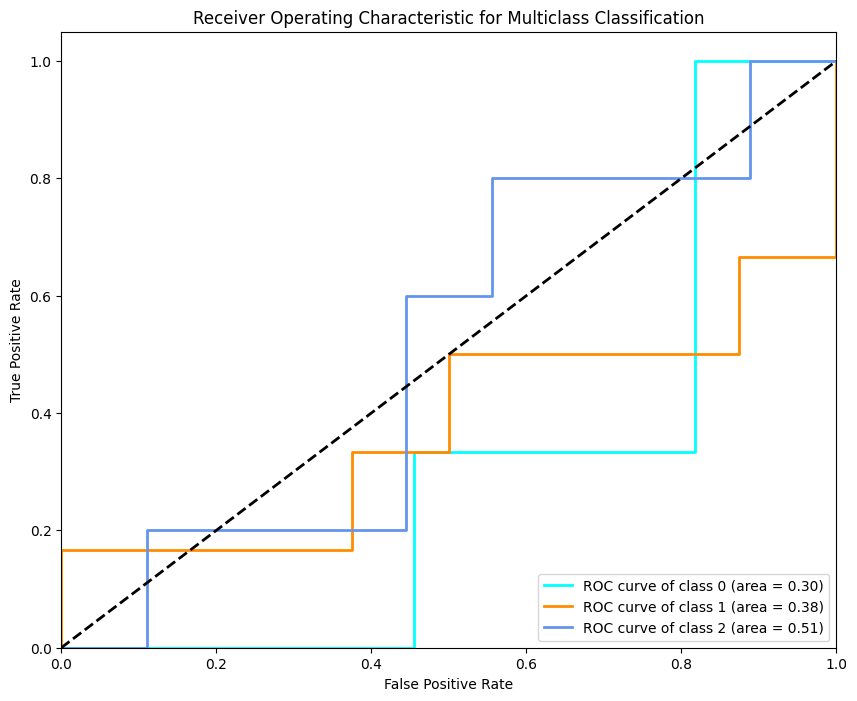

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('multiclass_classification_cnn_model.h5')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["Class A", "Class B", "Class C"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "unknown_image.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)
